In [1]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2  # OpenCV for image handling

In [2]:
# Load the trained model from .h5 file
model = load_model('/content/oak_wilt_demo2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Image dimensions expected by the model (replace with your actual input size)
img_height, img_width = 256, 256

In [4]:
# Function to preprocess a single image
def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Read image using OpenCV
    img = cv2.resize(img, (img_width, img_height))  # Resize to the expected dimensions
    img = img / 255.0  # Normalize the image by dividing by 255.0
    return img

In [5]:
# Load and preprocess multiple images
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = preprocess_image(img_path)
        images.append(img)
    return np.array(images)

In [6]:
# Measure inference time per image
def measure_inference_time(model, X_test):
    times = []
    for img in X_test:
        start_time = time.time()
        model.predict(np.expand_dims(img, axis=0))  # Predicting for one image
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times)
    print(f"Average inference time per image: {avg_time * 1000:.2f} ms")

    # Return the times and average time
    return times, avg_time

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Plot inference times for each image and the average
def plot_inference_times(times, avg_time):
    img_indices = np.arange(len(times))
    times_ms = [t * 1000 for t in times]  # Convert to milliseconds

    # Plot the inference times
    plt.figure(figsize=(10, 6))
    plt.bar(img_indices, times_ms, color='skyblue', label='Inference Time per Image')
    plt.axhline(y=avg_time * 1000, color='r', linestyle='--', label=f'Average Inference Time: {avg_time * 1000:.2f} ms')

    plt.xlabel('Image Index')
    plt.ylabel('Inference Time (ms)')
    plt.title('Inference Time per Image and Average Inference Time')
    plt.legend()
    plt.show()

In [9]:
# Paths to your images
image_paths = ['/content/IMG_0108.jpg', '/content/IMG_0124.jpg', '/content/uploaded_image.jpg']

In [10]:
# Load and preprocess the images
X_test = load_images(image_paths)

In [11]:
# Run the inference timing
times, avg_inference_time = measure_inference_time(model, X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Average inference time per image: 203.06 ms


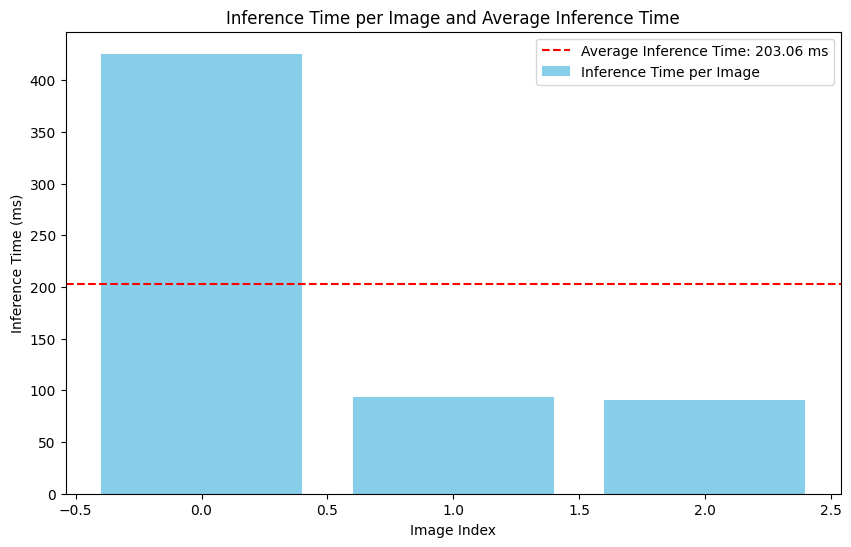

In [12]:
# Plot the inference times and average
plot_inference_times(times, avg_inference_time)